In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer , silhouette_visualizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

## Data Cleaning

In [54]:
df = pd.read_csv("C:/Users/hp/Downloads/archive/marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [56]:
df.dropna(subset = ['Income'], inplace = True)

In [57]:
df.drop(columns = ['ID', 'Dt_Customer'] , axis = 1 , inplace = True)

In [58]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [59]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [60]:
# handel categorical Data
label_encoder = LabelEncoder()

df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   int32  
 2   Marital_Status       2216 non-null   int32  
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Recency              2216 non-null   int64  
 7   MntWines             2216 non-null   int64  
 8   MntFruits            2216 non-null   int64  
 9   MntMeatProducts      2216 non-null   int64  
 10  MntFishProducts      2216 non-null   int64  
 11  MntSweetProducts     2216 non-null   int64  
 12  MntGoldProds         2216 non-null   int64  
 13  NumDealsPurchases    2216 non-null   int64  
 14  NumWebPurchases      2216 non-null   int64  
 15  NumCatalogPurchases  2216 non-null   i

In [62]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [63]:
scaled_df

array([[-0.98644293, -0.35052725,  0.25421812, ...,  0.        ,
         0.        ,  2.37795178],
       [-1.23680074, -0.35052725,  0.25421812, ...,  0.        ,
         0.        , -0.42052997],
       [-0.31882209, -0.35052725,  1.18230273, ...,  0.        ,
         0.        , -0.42052997],
       ...,
       [ 1.01641959, -0.35052725, -1.60195109, ...,  0.        ,
         0.        , -0.42052997],
       [-1.06989553,  0.53924181,  1.18230273, ...,  0.        ,
         0.        , -0.42052997],
       [-1.23680074,  1.42901088, -0.67386649, ...,  0.        ,
         0.        ,  2.37795178]])

In [64]:
pca_model = PCA()
pca_model.fit(scaled_df)

PCA()

In [65]:
df.shape

(2216, 27)

Text(0, 0.5, 'Variance')

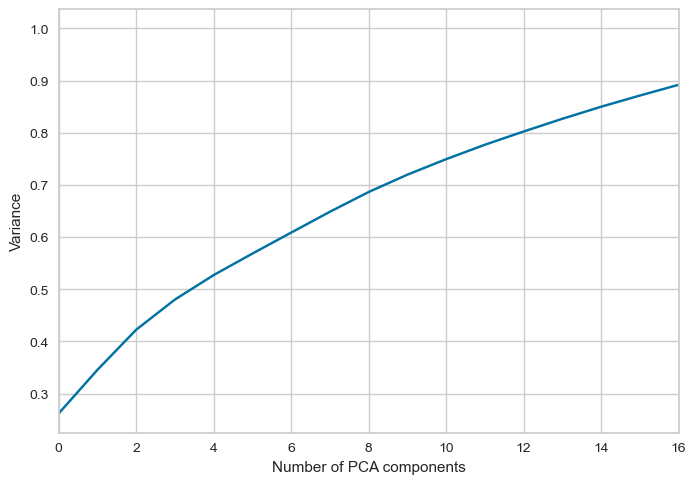

In [66]:
plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
plt.xlim(0,16,1)
plt.xlabel("Number of PCA components")
plt.ylabel("Variance")

In [67]:
pca_model = PCA(n_components = 16)
pca_data = pca_model.fit_transform(scaled_df)
pca_data

array([[ 3.76425487, -0.30740841, -0.40241968, ..., -0.42342354,
         0.8215331 ,  0.70462388],
       [-2.38433959,  0.17785899, -0.240655  , ..., -0.0316435 ,
        -0.27168394, -0.2017732 ],
       [ 1.62174471, -0.16497515, -1.10889094, ..., -0.1156735 ,
         0.11498756,  0.37257857],
       ...,
       [ 1.44185883,  0.11879785,  0.9372994 , ..., -1.63916626,
         1.21112653, -1.17694255],
       [ 1.77749612,  1.25873438, -1.20155713, ...,  0.22979705,
         0.13423358, -0.05520575],
       [-1.66240894,  1.2609976 ,  1.16688531, ...,  0.03373836,
        -0.44191429, -0.02805382]])

In [68]:
scores = []
k_range = range(1,10)
for k in k_range:
    kmeans_model =KMeans(n_clusters =k)
    kmeans_model.fit(pca_data)
    scores.append(kmeans_model.inertia_)

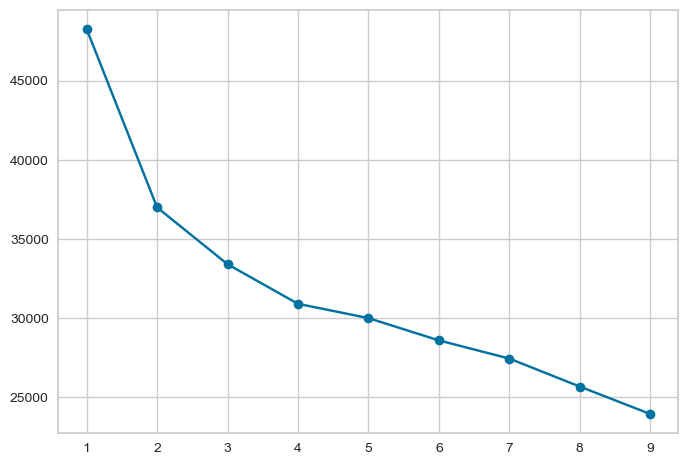

In [69]:
plt.plot(k_range, scores, marker ='o')

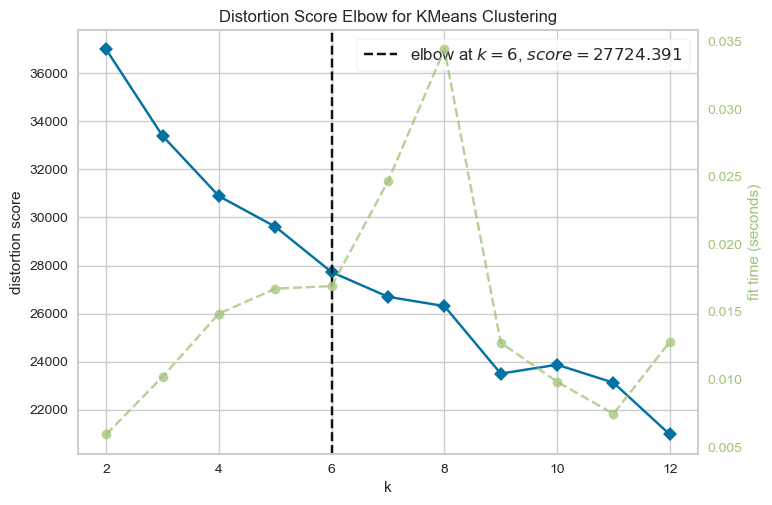

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [70]:
elbow = KElbowVisualizer(KMeans(), k = 12)
elbow.fit(pca_data)
elbow.show()

In [71]:
scores = []
silhouette_scores = []
k_range = range(2,10)
for k in k_range:
    kmeans_model = KMeans(n_clusters = k)
    y_pred = kmeans_model.fit_predict(pca_data)
    kmeans_model.fit(pca_data)
    scores.append(kmeans_model.inertia_)

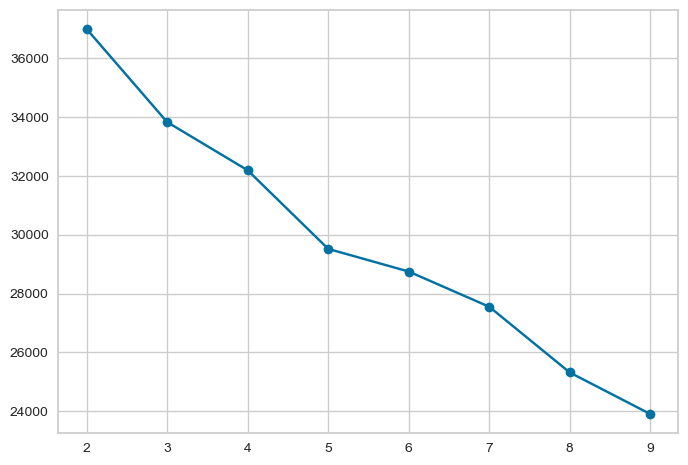

In [72]:
plt.plot(k_range , scores , marker ='o')

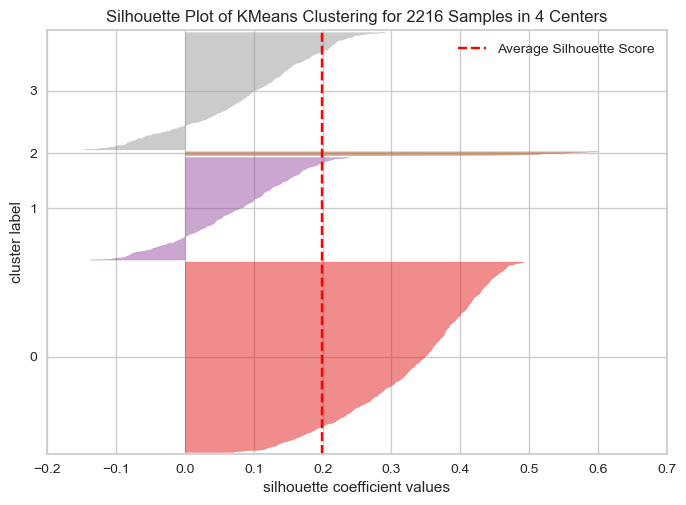

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2216 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [74]:
model =KMeans(4, random_state = 42)
visualizer = silhouette_visualizer(model,pca_data, color = 'yellowbrick')
visualizer.fit(pca_data)
visualizer.show()

In [75]:
scores = []
silhouette_scores  = []

k_range = range(2,10)
for k in k_range:
    kmeans_model = KMeans(n_clusters = k)
    y_pred = kmeans_model.fit_predict(pca_data)
    scores.append(kmeans_model.inertia_)
    silhouette_scores.append(silhouette_score(pca_data, y_pred))
    
    print("k = ", k )
    print("silhouette score : %0.4f" % silhouette_score(pca_data, y_pred))

k =  2
silhouette score : 0.2629
k =  3
silhouette score : 0.1929
k =  4
silhouette score : 0.1940
k =  5
silhouette score : 0.1236
k =  6
silhouette score : 0.1053
k =  7
silhouette score : 0.1748
k =  8
silhouette score : 0.1213
k =  9
silhouette score : 0.1283


In [76]:
kmeans_model = KMeans(n_clusters = 2 , random_state = 42)
kmeans_model.fit(pca_data)
y_pred = kmeans_model.predict(pca_data)

In [77]:
y_pred

array([1, 0, 1, ..., 1, 1, 0])

In [78]:
df['cluster'] = y_pred
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,cluster
0,1957,2,4,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,0,3,11,1,1
1,1954,2,4,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,3,11,0,0
2,1965,2,5,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,3,11,0,1
3,1984,2,5,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,3,11,0,0
4,1981,4,3,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,3,11,0,0
